In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import pandas as pd

train_data = pd.read_csv('datasets/images/sign_mnist_train.csv')
test_data = pd.read_csv('datasets/images/sign_mnist_test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [4]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(train_data)
y_test = label_binarizer.fit_transform(test_data)

ValueError: Multioutput target data is not supported with label binarization

In [11]:
from tensorflow import one_hot
train_labels = train_data.iloc[:, 0]
train_images = (train_data.iloc[:, 1:] / 255).to_numpy().reshape((-1, 28, 28, 1))


test_labels = test_data.iloc[:, 0]
test_images = (test_data.iloc[:, 1:] / 255).to_numpy().reshape((-1, 28, 28, 1))

train_labels_onehot = one_hot(train_labels, 25).numpy()
test_labels_onehot = one_hot(test_labels, 25).numpy()


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_images)

In [18]:
train_labels_onehot[27454]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

#  Keras Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, DepthwiseConv2D, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
model = Sequential()

# model.add(Dense(784, activation='relu'))
# model.add(Dense(392, activation='relu'))
# model.add(Dense(196, activation='relu'))
# model.add(Dense(25, activation='softmax'))

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(25, activation='softmax'))

# model = Sequential()
# model.add(Conv2D(200 , (6,6), strides = 1, padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
# model.add(Conv2D(175, (5,5), strides = 1, padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
# model.add(Conv2D(150, (5,5), strides = 1, padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
# model.add(Conv2D(125, (4,4), strides = 1, padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
# model.add(Conv2D(100, (4,4), strides = 1, padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
# model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))
# model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))
# model.add(Conv2D(25 , (3,3) , strides = 1, padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))
# model.add(Flatten())
# model.add(Dense(units = 512 , activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(units = 25 , activation = 'softmax'))


model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 25 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

# model = Sequential()

# model.add(Conv2D(75, (3,3), strides=1, padding = 'same' , activation = 'relu', input_shape = (28,28,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

# model.add(Conv2D(50, (3,3), strides=1, padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

# model.add(Conv2D(25, (3,3), strides=1, padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

# model.add(Flatten())
# model.add(Dense(units = 512 , activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(units = 24, activation = 'softmax'))



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)         

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# lrdecay = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model.fit(datagen.flow(train_images,train_labels_onehot, batch_size = 128), epochs=40, validation_data = (test_images, test_labels_onehot), callbacks = [learning_rate_reduction])
# history = model.fit(datagen.flow(train_images,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

  ...
    to  
  ['...']
Train for 215 steps, validate on 7172 samples
Epoch 1/40
215/215 [==============================] - 8s 38ms/step - loss: 1.7855 - accuracy: 0.4327 - val_loss: 4.3797 - val_accuracy: 0.1207
Epoch 2/40
215/215 [==============================] - 6s 30ms/step - loss: 0.7323 - accuracy: 0.7496 - val_loss: 3.5512 - val_accuracy: 0.2659
Epoch 3/40
215/215 [==============================] - 6s 30ms/step - loss: 0.4305 - accuracy: 0.8526 - val_loss: 0.5406 - val_accuracy: 0.8041
Epoch 4/40
215/215 [==============================] - 6s 30ms/step - loss: 0.2901 - accuracy: 0.9010 - val_loss: 0.3043 - val_accuracy: 0.8982
Epoch 5/40
215/215 [==============================] - 7s 30ms/step - loss: 0.2161 - accuracy: 0.9278 - val_loss: 0.3695 - val_accuracy: 0.8882
Epoch 6/40
215/215 [==============================] - 7s 30ms/step - loss: 0.1796 - accuracy: 0.9395 - val_loss: 0.0897 - val_accuracy: 0.9693
Epoch 7/40
215/215 [==============================] - 6s 30ms/step - lo

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)         

In [22]:
import numpy as np

predict_test_labels = np.argmax(model.predict(test_images), axis=-1)
print(predict_test_labels)

[ 6  5 10 ...  2  4  2]


In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
#confusion_matrix(test_labels, predict_test_labels)
print('Precision: {}'.format(precision_score(test_labels, predict_test_labels, average='macro')))
print('Recall: {}'.format(recall_score(test_labels, predict_test_labels, average='macro')))

Precision: 0.9989203076674514
Recall: 0.9992323581914251


# Prediction

In [19]:
img = cv2.imread('test/185.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
img = cv2.flip(img, 1)
img = img / 255
                     
#Show the image with matplotlib
plt.imshow(img)
plt.show()


NameError: name 'cv2' is not defined

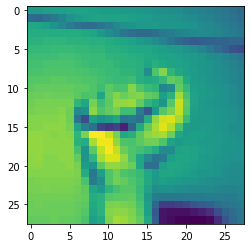

In [20]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('data2/A/1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
# img = cv2.rotate(cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA), cv2.ROTATE_90_COUNTERCLOCKWISE)

# brightness = 50
# contrast = 30
# img = np.int16(img)
# img = img * (contrast/127+1) - contrast + brightness
# img = np.clip(img, 0, 255)
# img = np.uint8(img)

# img = img / 255
                     
#Show the image with matplotlib
plt.imshow(img)
plt.show()



In [24]:
chars = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'K',
    10: 'L',
    11: 'M',
    12: 'N',
    13: 'O',
    14: 'P',
    15: 'Q',
    16: 'R',
    17: 'S',
    18: 'T',
    19: 'U',
    20: 'V',
    21: 'W',
    22: 'X',
    23: 'Y'
}


predicted_index = np.argmax(model.predict(img.reshape((-1, 28, 28, 1))))
print(model.predict(img.reshape((-1, 28, 28, 1))))
chars[predicted_index]




[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]]


'T'

# Save

In [25]:
model.save('christina-small')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: christina-small\assets


INFO:tensorflow:Assets written to: christina-small\assets


# Load

In [16]:
from tensorflow.keras.models import load_model
model = load_model('christina-small-1')

# Save as TensorFlow Lite

In [11]:
# from tensorflow.lite.TFLiteConverter import from_saved_model
# from tensorflow.io.gfile import GFile
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model('christina')
tflite_model = converter.convert()
with tf.io.gfile.GFile('christina.tflite', 'wb') as f:
  f.write(tflite_model)


In [20]:
print(np.array(train_images).reshape(-1,28, 28).shape)

for i, img in enumerate(np.array(test_images).reshape(-1,28, 28)):
    cv2.imwrite('./test/'+str(i)+'.jpg', img*255)

(27455, 28, 28)
